In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from math import sqrt

font_name = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf').get_name()
rc('font', family=font_name)

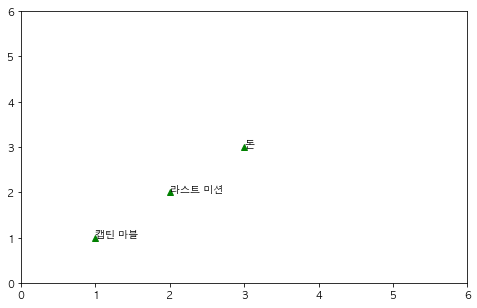

In [2]:
plt.figure(figsize=(8,5))
plt.plot([1,2,3], [1,2,3], 'g^')
plt.text(1,1, '캡틴 마블')
plt.text(2,2, '라스트 미션')
plt.text(3,3, '돈')
plt.axis([0,6,0,6])
plt.show()

In [3]:
ratings = {
    'user1': {
        '돈': 2.5,
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 3.0,
        '극한직업': 3.5,
        '이스케이프 룸': 2.5,
        '증인': 3.0,
    },
    'user2': {
        '돈': 1.0,
        '캡틴마블': 4.5,
        '보헤미안 랩소디': 0.5,
        '극한직업': 1.5,
        '이스케이프 룸': 4.5,
        '증인': 5.0,
    },
    'user3': {
        '돈': 3.0,
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 1.5,
        '극한직업': 5.0,
        '증인': 3.0,
        '이스케이프 룸': 3.5,
    },
    'user4': {
        '돈': 2.5,
        '캡틴마블': 3.0,
        '극한직업': 3.5,
        '증인': 4.0,
    },
    'user5': {
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 3.0,
        '증인': 4.5,
        '극한직업': 4.0,
        '이스케이프 룸': 2.5,
    },
    'user6': {
        '돈': 3.0,
        '캡틴마블': 4.0,
        '보헤미안 랩소디': 2.0,
        '극한직업': 3.0,
        '증인': 3.5,
        '이스케이프 룸': 2.0,
    },
    'user7': {
        '돈': 3.0,
        '캡틴마블': 4.0,
        '증인': 3.0,
        '극한직업': 5.0,
        '이스케이프 룸': 3.5,
    },
    'user8': {
        '캡틴마블': 4.5, 
        '이스케이프 룸': 1.0,
        '극한직업': 4.0,
    },
    'user9': {
        '돈': 3.7,
        '캡틴마블': 4.0, 
        '이스케이프 룸': 3.0,
        '극한직업': 4.9,
        '보헤미안 랩소디': 4.1,
    }
}

In [4]:
def draw_chart(data, name1, name2):
    plt.figure(figsize=(8,5))
    x_ratings = []
    y_ratings = []
    for i in ratings[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            x_ratings.append(ratings[name1][i])
            y_ratings.append(ratings[name2][i])
            plt.text(ratings[name1][i],ratings[name2][i], i) # 영화 제목을 text로 출력
    plt.plot(x_ratings, y_ratings, 'g^')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()

In [5]:
def pearson_correlation_coefficient(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for movie in data[name1]: # i = key
        if movie in data[name2]: # 같은 영화를 평가했을때만
            sumX += data[name1][movie]
            sumY += data[name2][movie]
            sumPowX += pow(data[name1][movie], 2)
            sumPowY += pow(data[name2][movie], 2)
            sumXY += data[name1][movie] * data[name2][movie]
            count += 1
    
    return ( sumXY - ((sumX * sumY) / count)) \
                / sqrt((sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2) / count)))


In [6]:
print(pearson_correlation_coefficient(ratings, 'user1', 'user3'))
print(pearson_correlation_coefficient(ratings, 'user5', 'user8'))

0.39605901719066977
0.8934051474415647


In [7]:
user1=[2.5,3.5,3.0,3.5,2.5,3.0] #돈,캡틴마블,보헤미안랩소디,극한직업,이스케이프룸,증인
user3=[3.0,3.5,1.5,5.0,3.5,3.0] #돈,캡틴마블,보헤미안랩소디,극한직업,이스케이프룸,증인
user5=[3.5,2.5,4.0] #캡틴마블,이스케이프룸,극한직업
user8=[4.5,1.0,4.0] #캡틴마블,이스케이프룸,극한직업
import scipy.stats as stats
corr1 = stats.pearsonr(user1, user3)
corr2 = stats.pearsonr(user5, user8)
print(corr1)
print(corr2)

(0.39605901719066977, 0.4369749265426754)
(0.8934051474415641, 0.29661883133160066)


In [8]:
def nearest_user(data, name, index=3):
    result = []
    # 자신(name)하고 가장 가까운 사람의 데이터 출력 
    for u in data:
        if u != name: 
            result.append((pearson_correlation_coefficient(data, name, u), u))
    
    result.sort()
    result.reverse()
    
    return result[:index]

In [9]:
nearest_user(ratings, 'user1',len(ratings))

[(0.9912407071619299, 'user8'),
 (0.7997092494906695, 'user9'),
 (0.7470178808339965, 'user7'),
 (0.5669467095138396, 'user5'),
 (0.5582905262390823, 'user6'),
 (0.40451991747794525, 'user4'),
 (0.39605901719066977, 'user3'),
 (0.05477225575051661, 'user2')]

In [10]:
def getRecommendation (data, user):
    rcmmdList = []
    result = nearest_user(data, user, len(data))
    
    score = 0
    score_dic = {} # 유사도 총합을 위한 dict
    similarity_dic = {} # 평점 총합을 위한 dict 
    
    for similarity, name in result:
        if similarity < 0:
            continue
        
        for movie in data[name]:
            if movie not in data[user]: # name이 평가를 내리지 않은 영화
                score += similarity * data[name][movie] # 영화평점 * 유사도
                score_dic.setdefault(movie, 0) # 기본값 설정
                score_dic[movie] += score # 합계 구하기 
                
                # 조건에 맞는 사람의 유사도의 누적합 구하기
                similarity_dic.setdefault(movie, 0)
                similarity_dic[movie] += similarity
            
            score = 0 #영화가 바뀌었으니 초기화
    
    for key in score_dic:
        # 평점 총합 / 유사도 총합
        score_dic[key] = score_dic[key] / similarity_dic[key] 
        rcmmdList.append((score_dic[key], key))
    
    rcmmdList.sort()
    rcmmdList.reverse()
    
    return rcmmdList

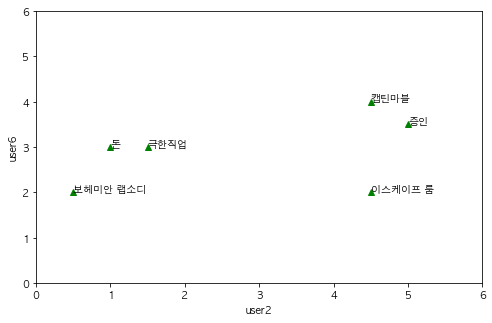

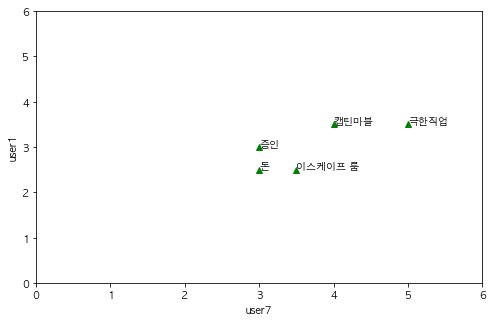

In [11]:
draw_chart(ratings, 'user2', 'user6')
draw_chart(ratings, 'user7', 'user1')

In [12]:
print(pearson_correlation_coefficient(ratings, 'user2', 'user6'))
print(pearson_correlation_coefficient(ratings, 'user7', 'user1'))
print('-' * 20)
print(nearest_user(ratings, 'user8', 3))
print('-' * 20)

0.41791069697885247
0.7470178808339965
--------------------
[(0.9912407071619299, 'user1'), (0.9244734516419049, 'user6'), (0.8934051474415647, 'user5')]
--------------------


In [13]:
rcmmdList = getRecommendation(ratings, 'user8')

In [14]:
print(rcmmdList)

[(3.467750847406967, '증인'), (3.019037058253216, '돈'), (2.848855549166695, '보헤미안 랩소디')]


In [15]:
print(rcmmdList[0])

(3.467750847406967, '증인')


In [16]:
getRecommendation(ratings, 'user7')

[(2.7683838067022903, '보헤미안 랩소디')]

In [17]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.
